STAT 453: Deep Learning (Spring 2024)  
Instructor: Yiqiao Zhong (yiqiao.zhong@wisc.edu)  

Resources from previous years:
Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2020/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss20

# HW 2: A Single Layer Neuron with a Non-Linear Activation Function (50 pts)

# Problem Setting

Suppose you have a neuron model where the activation function (which is an identity function in ADALINE) is replaced by a non-linear activation function. The figure below shows an arbitrary single-layer neuron.

- If $\sigma(z) = z$, the activation function is an identity function and the neuron represents ADALINE.
- If $\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$, the activation function is a hyperbolic tangent (tanh), which is a non-linear sigmoid function (https://en.wikipedia.org/wiki/Sigmoid_function).


![](images/neuron.png)

As mentioned above, in this homework, we are working with a tanh activation function, which we defined as
$$
\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}},
$$

![](images/tanh.png)

Here $z$ denotes the net input,  $z = \mathbf{w}^\top \mathbf{x} + b$ (for a single training example, we write $z^{[i]} = \mathbf{w}^\top \mathbf{x}^{[i]} + b$).

Assume now that we want learn the parameters of the neuron model for a binary classification task with class labels $y \in \{0, 1\}$ similar to ADALINE. We use the same loss function, mean squared error (MSE), as in ADALINE, during training:



$$
\mathcal{L}(\mathbf{\hat{y}}, \mathbf{y}) = \frac{1}{n} \sum_{i}^{} (\hat{y}^{[i]} - y^{[i]})^2.
$$

## TASK 1: Compute the Loss Gradients with respect to the weights and bias unit  -- 25 pts

Your task is to derive the gradient of the loss $\mathcal{L}$ with respect to the weight vector and the bias unit and formulate the learning rule. 

Remember that the gradient of the loss is defined as 

$$
\nabla_\mathbf{w} \mathcal{L}(\mathbf{w}) = 
\begin{bmatrix}
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_1}\\
\vdots \\
\frac{\partial \mathcal{L}(\mathbf{w})}{\partial w_m}\\
\end{bmatrix}
$$

**For simplicity, it is sufficient if you write down the partial derivative and learning rule for a single weight $w_j$ and the bias unit $b$**. 

To provide you with a hint, recall that we computed the partial Loss derivatives for ADALINE as follows:

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial w_j}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})   x_j^{[i]}
\end{align}
$$

<br>
<br>

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \frac{\partial}{\partial b}  \frac{1}{n} \sum_i (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})^2\\
\\
&= \quad ... \\
\\
&= \sum_i \frac{2}{n}  (\sigma(\mathbf{w}^T\mathbf{x}^{[i]} + b) - y^{[i]})
\end{align}
$$

Again, your task is to derive 

- a) $$\frac{\partial \mathcal{L}}{\partial w_j}$$ 

and 

- b) $$\frac{\partial \mathcal{L}}{\partial b}$$ 

for the neuron model with the non-linear activation function 

$$
\sigma(\mathbf{w}^\top \mathbf{x} + b) =  \frac{e^{\mathbf{w}^\top \mathbf{x} + b} - e^{- (\mathbf{w}^\top \mathbf{x} + b)}}{e^{\mathbf{w}^\top \mathbf{x}+b} + e^{- (\mathbf{w}^\top \mathbf{x}+ b)}}
$$

For partial credits in case of a wrong solution, also write down the individual steps in the cell below.

**!!!Fill in with your solution below!!!**

$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{\partial}{\partial w_j} \frac{1}{n}\sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \sum_i 2(\sigma(z) - y^{[i]} ) \frac{\partial}{\partial w_j}(\tanh(z) - y^{[i]})\\
&= \sum_i \frac{2}{n} (\sigma(z) - y^{[i]} ) (1-\tanh^2(\mathbf{w}^\top \mathbf{x} + b))\frac{\partial}{\partial w_j}(\mathbf{w}^\top \mathbf{x} + b) \\
&= \sum_i \frac{2}{n} (\sigma(\mathbf{w}^\top \mathbf{x} + b) - y^{[i]} ) (1-\tanh^2(\mathbf{w}^\top \mathbf{x} + b)) \mathbf{x_j}^{[i]} \\
\end{align}
$$

<br>
<br>

**!!!Fill in with your solution below!!!**
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial b} &= \frac{\partial}{\partial b} \frac{1}{n} \sum_i (\hat{y}^{[i]} - y^{[i]} )^2\\
&= \sum_i 2(\sigma(z) - y^{[i]} ) \frac{\partial}{\partial b}(\tanh(z) - y^{[i]})\\
&= \sum_i \frac{2}{n} (\sigma(z) - y^{[i]} ) (1-\tanh^2(\mathbf{w}^\top \mathbf{x} + b))\frac{\partial}{\partial b}(\mathbf{w}^\top \mathbf{x} + b) \\
&= \sum_i \frac{2}{n} (\sigma(\mathbf{w}^\top \mathbf{x} + b) - y^{[i]} ) (1-\tanh^2(\mathbf{w}^\top \mathbf{x} + b)) \\
\end{align}
$$

# Coding Section

Complete the code below, the missing parts are indicated via 

    # <YOUR CODE HERE>
    
to implement the neuron model (it is very similar to the ADALINE model we discussed in class, except the derivatives).

## Imports (Don't modify this section, just execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
%matplotlib inline

## Loading the dataset (Don't modify this section, just execute)

**No modification required.** You should execute this code and are encouraged to explore it further, but it is recommended to  not make any alterations here.

In [4]:
df = pd.read_csv('./datasets/iris.data', index_col=None, header=None)
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']
df = df.iloc[50:150]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

,x1,x2,x3,x4,y
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [5]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.int)

# Shuffling & train/test split

torch.manual_seed(123)
shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)

X, y = X[shuffle_idx], y[shuffle_idx]

percent70 = int(shuffle_idx.size(0)*0.7)

X_train, X_test = X[shuffle_idx[:percent70]], X[shuffle_idx[percent70:]]
y_train, y_test = y[shuffle_idx[:percent70]], y[shuffle_idx[percent70:]]

# Normalize (mean zero, unit variance)

mu, sigma = X_train.mean(dim=0), X_train.std(dim=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

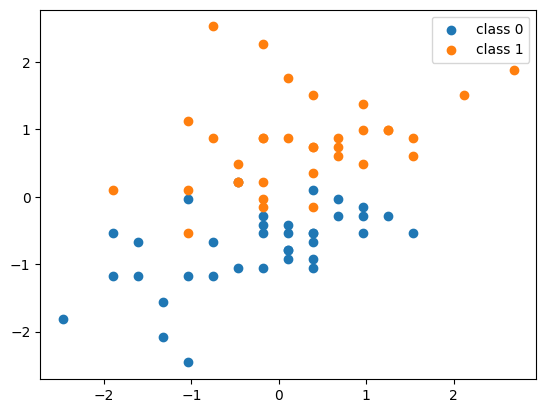

In [6]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='class 1')
plt.legend()
plt.show()

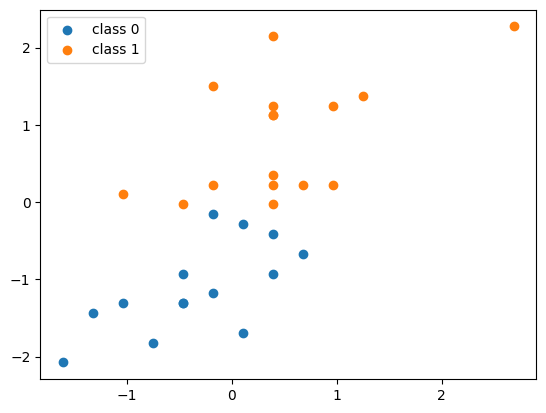

In [7]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label='class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label='class 1')
plt.legend()
plt.show()

## TASK 2: Implement the Neuron Model (Modifications required) -- 25 pts

Your task is to complete the `backward` method to compute the gradients based on the gradients you computed in TASK1.

In [8]:
class NeuronModel():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features, 1, 
                                   dtype=torch.float)
        self.bias = torch.zeros(1, dtype=torch.float)
        
    def activation_func(self, x):
        return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
    
    def netinput_func(self, x, w, b):
         return torch.add(torch.mm(x, w), b)

    def forward(self, x):
        netinputs = self.netinput_func(x, self.weights, self.bias)
        activations = self.activation_func(netinputs)
        return activations.view(-1)
        
    def backward(self, x, yhat, y):  
        
        # note that here, "yhat" are the "activations" 
        netinputs = self.netinput_func(x, self.weights, self.bias)
        
        grad_loss_yhat = 2 * (yhat - y)
        grad_yhat_bias = 1 - torch.square(yhat)
        grad_yhat_weights = x * (1 - torch.square(yhat)).view(-1,1)
        
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1,1)) / y.size(0)
        grad_loss_bias = torch.mm(grad_yhat_bias.view(-1,1).t(), grad_loss_yhat.view(-1,1)).squeeze() / y.size(0)
        
        return (-1)*grad_loss_weights, (-1)*grad_loss_bias

# No modifications required beyond this point

You do not need to modify anything below. However, you should run and analyze the code to verify that your implementation of the Neuron model is likely correct.

## Training the Neuron Model (Don't modify this section, just execute)

In [9]:
####################################################
##### Training and evaluation wrappers
###################################################

def loss(yhat, y):
    return torch.mean((yhat - y)**2)


def train(model, x, y, num_epochs,
          learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    
    torch.manual_seed(seed)
    for e in range(num_epochs):
        
        #### Shuffle epoch
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:

            #### Compute outputs ####
            yhat = model.forward(x[minibatch_idx])

            #### Compute gradients ####
            negative_grad_w, negative_grad_b = \
                model.backward(x[minibatch_idx], yhat, y[minibatch_idx])

            #### Update weights ####
            model.weights += learning_rate * negative_grad_w
            model.bias += learning_rate * negative_grad_b
            
            #### Logging ####
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('    Minibatch MSE: %.3f' % minibatch_loss)

        #### Logging ####
        yhat = model.forward(x)
        curr_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % curr_loss)
        cost.append(curr_loss)

    return cost

In [10]:
model = NeuronModel(num_features=X_train.size(1))
cost = train(model, 
             X_train, y_train.float(),
             num_epochs=150,
             learning_rate=0.04,
             seed=123,
             minibatch_size=10)

    Minibatch MSE: 0.500
    Minibatch MSE: 0.430
    Minibatch MSE: 0.364
    Minibatch MSE: 0.413
    Minibatch MSE: 0.293
    Minibatch MSE: 0.235
    Minibatch MSE: 0.221
Epoch: 001 | MSE: 0.23416
    Minibatch MSE: 0.283
    Minibatch MSE: 0.184
    Minibatch MSE: 0.183
    Minibatch MSE: 0.132
    Minibatch MSE: 0.206
    Minibatch MSE: 0.149
    Minibatch MSE: 0.276
Epoch: 002 | MSE: 0.16600
    Minibatch MSE: 0.132
    Minibatch MSE: 0.144
    Minibatch MSE: 0.136
    Minibatch MSE: 0.183
    Minibatch MSE: 0.125
    Minibatch MSE: 0.201
    Minibatch MSE: 0.154
Epoch: 003 | MSE: 0.13897
    Minibatch MSE: 0.136
    Minibatch MSE: 0.167
    Minibatch MSE: 0.102
    Minibatch MSE: 0.161
    Minibatch MSE: 0.143
    Minibatch MSE: 0.134
    Minibatch MSE: 0.094
Epoch: 004 | MSE: 0.12548
    Minibatch MSE: 0.155
    Minibatch MSE: 0.188
    Minibatch MSE: 0.161
    Minibatch MSE: 0.105
    Minibatch MSE: 0.100
    Minibatch MSE: 0.060
    Minibatch MSE: 0.088
Epoch: 005 | MSE: 0.1

## Evaluate the Trained Model  (Don't modify this section, just execute)

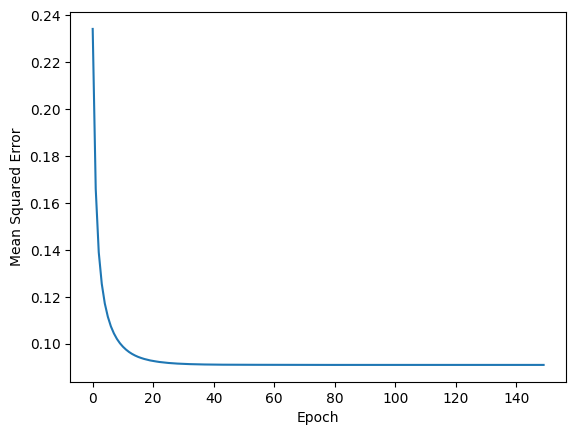

In [11]:
plt.plot(range(len(cost)), cost)
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

In [12]:
print('Weights', model.weights)
print('Bias', model.bias)

Weights tensor([[-0.1975],
        [ 0.7200]])
Bias tensor([0.6350])


In [13]:
train_pred = model.forward(X_train)
train_acc = torch.mean(
    (torch.where(train_pred > 0.5, 
                 torch.tensor(1), 
                 torch.tensor(0)).int() == y_train).float())

test_pred = model.forward(X_test)
test_acc = torch.mean(
    (torch.where(test_pred > 0.5, 
                 torch.tensor(1), 
                 torch.tensor(0)).int() == y_test).float())

print('Training Accuracy: %.2f%%' % (train_acc*100))
print('Test Accuracy: %.2f%%' % (test_acc*100))

Training Accuracy: 91.43%
Test Accuracy: 93.33%


## Decision Boundary  (Don't modify this section, just execute)

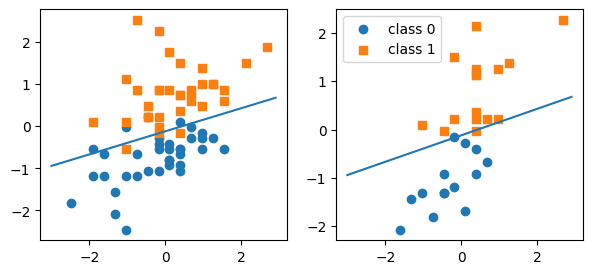

In [14]:
import sympy
import numpy as np
w, b = model.weights, model.bias
w = w.view(1, -1).tolist()[0]
b = b.tolist()[0]
z = sympy.symbols('z', real = True)
critical_value_for_netinput = sympy.solve(sympy.tanh(z) - 0.5, z)[0]
feature_1 = np.arange(-3, 3, 0.1)
feature_2 = (critical_value_for_netinput - b - w[0] * feature_1) / w[1]

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot(feature_1, feature_2)
ax[1].plot(feature_1, feature_2)

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()